In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
%matplotlib inline

In [2]:
u1 = np.loadtxt('data3/u1.txt')
u2 = np.loadtxt('data3/u2.txt')
image1 = Image.open('data3/pokemon_12.jpg')
image2 = Image.open('data3/pokemon_24.jpg')

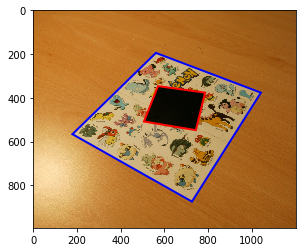

In [3]:
plt.imshow(image1)
plt.gca().add_patch(
    plt.Polygon(u1[:4], fill=False, color='b', linewidth=2)
)
plt.gca().add_patch(
    plt.Polygon(u1[4:], fill=False, color='r', linewidth=2)
)

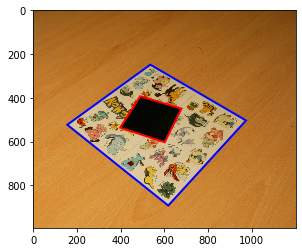

In [4]:
plt.imshow(image2)
plt.gca().add_patch(
    plt.Polygon(u2[:4], fill=False, color='b', linewidth=2)
)
plt.gca().add_patch(
    plt.Polygon(u2[4:], fill=False, color='r', linewidth=2)
)

In [5]:
lines1 = [np.cross([*u1[0], 1], [*u1[1], 1]),
          np.cross([*u1[2], 1], [*u1[3], 1]),
          np.cross([*u1[0], 1], [*u1[3], 1]),
          np.cross([*u1[2], 1], [*u1[1], 1]),
          np.cross([*u1[4], 1], [*u1[5], 1]),
          np.cross([*u1[6], 1], [*u1[7], 1]),
          np.cross([*u1[4], 1], [*u1[7], 1]),
          np.cross([*u1[6], 1], [*u1[5], 1])
         ]

lines2 = [np.cross([*u2[0], 1], [*u2[1], 1]),
          np.cross([*u2[2], 1], [*u2[3], 1]),
          np.cross([*u2[0], 1], [*u2[3], 1]),
          np.cross([*u2[2], 1], [*u2[1], 1]),
          np.cross([*u2[4], 1], [*u2[5], 1]),
          np.cross([*u2[6], 1], [*u2[7], 1]),
          np.cross([*u2[4], 1], [*u2[7], 1]),
          np.cross([*u2[6], 1], [*u2[5], 1])
         ]

In [6]:
v_points1 = []
for i in range(0, len(lines1), 2):
    v_points1.append(np.cross(lines1[i], lines1[i+1]))
for i in range(len(v_points1)):
    v_points1[i] = v_points1[i] / v_points1[i][-1]
v_points1 = np.array(v_points1)
    
v_points2 = []
for i in range(0, len(lines2), 2):
    v_points2.append(np.cross(lines2[i], lines2[i+1]))
for i in range(len(v_points2)):
    v_points2[i] = v_points2[i] / v_points2[i][-1]
v_points2 = np.array(v_points2)

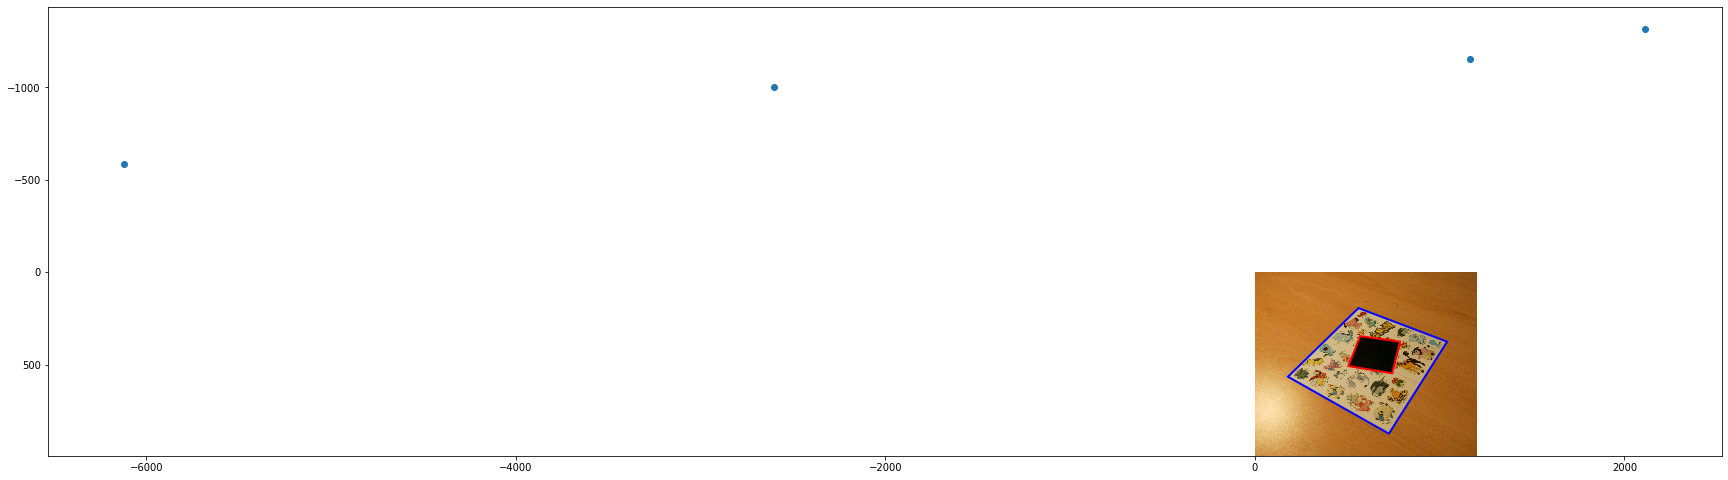

In [7]:
plt.rcParams["figure.figsize"] = (30, 30)
plt.imshow(image1)
plt.gca().add_patch(
    plt.Polygon(u1[:4], fill=False, color='b', linewidth=2)
)
plt.gca().add_patch(
    plt.Polygon(u1[4:], fill=False, color='r', linewidth=2)
)
plt.scatter(v_points1[:, 0], v_points1[:, 1])

In [8]:
v_points = np.vstack((v_points1, v_points2[2:]))
v_points = v_points.reshape((int(v_points.shape[0]/2), -1))
A = np.empty((3, 3))
b = np.empty((3, 1))
for i, v in enumerate(v_points):
    A[i] = np.array([v[5]*v[0] + v[3]*v[2], v[5]*v[1] + v[4]*v[2], v[5]*v[2]])
    b[i] = -(v[3]*v[0] + v[4]*v[1])


In [9]:
A, b

(array([[-4.88831474e+02, -2.32111121e+03,  1.00000000e+00],
        [-4.95490077e+03, -1.74132668e+03,  1.00000000e+00],
        [-4.43441636e+03, -2.70282078e+03,  1.00000000e+00]]),
 array([[4175413.25747456],
        [6446758.19606541],
        [7020980.78340519]]))

In [10]:
omega = np.linalg.solve(A, b).reshape(3,)
print(omega)
Omega = [[1, 0, omega[0]],
         [0, 1, omega[1]],
         [*omega]]

[-6.30411272e+02 -9.38478799e+02  1.68893473e+06]


In [11]:
np.matrix(Omega)

matrix([[ 1.00000000e+00,  0.00000000e+00, -6.30411272e+02],
        [ 0.00000000e+00,  1.00000000e+00, -9.38478799e+02],
        [-6.30411272e+02, -9.38478799e+02,  1.68893473e+06]])

In [12]:
k13 = -omega[0]
k23 = -omega[1]
k11 = np.sqrt(omega[2] - k13**2 - k23**2)

In [13]:
K = [[k11, 0, k13],
     [0, k11, k23],
     [0, 0, 1]]
print(np.matrix(K))

[[640.91645299   0.         630.41127215]
 [  0.         640.91645299 938.47879865]
 [  0.           0.           1.        ]]
